# MyAnimeList_API EDA

**Imports**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Exploring the Data

**Load the data**

In [2]:
anime_df = pd.read_csv("../data/anime_data.csv")

**Display the first few rows of the DataFrame**

In [3]:
anime_df.head()

,Unnamed: 0,mal_id,title,rank,score,season,year,aired_from,aired_to,popularity,...,rating,status,broadcast_day,broadcast_time,broadcast_timezone,producer,producer_id,studio,studio_id,type
0,0,49458,Kono Subarashii Sekai ni Shukufuku wo! 3,NaN,NaN,NaN,NaN,2024-01-01T00:00:00+00:00,NaN,1118,...,PG-13 - Teens 13 or older,Not yet aired,NaN,NaN,NaN,Nippon Columbia,323.0,Drive,1967.0,TV
1,1,52299,Ore dake Level Up na Ken,NaN,NaN,winter,2024.0,2024-01-01T00:00:00+00:00,NaN,1341,...,NaN,Not yet aired,NaN,NaN,NaN,Aniplex,17.0,A-1 Pictures,56.0,TV
2,2,51180,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu ...,NaN,NaN,winter,2024.0,2024-01-01T00:00:00+00:00,NaN,1465,...,PG-13 - Teens 13 or older,Not yet aired,NaN,NaN,NaN,Kadokawa,1696.0,Lerche,456.0,TV
3,3,49889,Tsuki ga Michibiku Isekai Douchuu 2nd Season,NaN,NaN,winter,2024.0,2024-01-01T00:00:00+00:00,NaN,2025,...,PG-13 - Teens 13 or older,Not yet aired,NaN,NaN,NaN,NaN,NaN,J.C.Staff,7.0,TV
4,4,48418,Maou Gakuin no Futekigousha: Shijou Saikyou no...,NaN,NaN,NaN,NaN,2024-01-01T00:00:00+00:00,NaN,2190,...,R - 17+ (violence & profanity),Not yet aired,NaN,NaN,NaN,Aniplex,17.0,SILVER LINK.,300.0,TV


**Check the shape of the DataFrame**

In [4]:
anime_df.shape

(5504, 25)

This DataFrame contains information about 5504 different anime titles. For each anime title, there are 24 pieces of information or characteristics recorded in the DataFrame. These characteristics include details like the title's score, rank, season, year, airing dates, and more. 

**Exploring Data Types**

In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5504 entries, 0 to 5503
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5504 non-null   int64  
 1   mal_id              5504 non-null   int64  
 2   title               5504 non-null   object 
 3   rank                5065 non-null   float64
 4   score               4923 non-null   float64
 5   season              2422 non-null   object 
 6   year                2422 non-null   float64
 7   aired_from          5504 non-null   object 
 8   aired_to            2975 non-null   object 
 9   popularity          5504 non-null   int64  
 10  favorites           5504 non-null   int64  
 11  members             5504 non-null   int64  
 12  episodes            5453 non-null   float64
 13  genre               4984 non-null   object 
 14  demographic         2372 non-null   object 
 15  rating              5432 non-null   object 
 16  status

The dataset encompasses a variety of data types, including both numerical and categorical variables. Numerical variables provide information on ratings, ranking, year, popularity, and membership, among others. Meanwhile, categorical variables include details about anime titles, release seasons, genres, and production aspects like producers, studios, and anime types. 

## Investigating Null Values

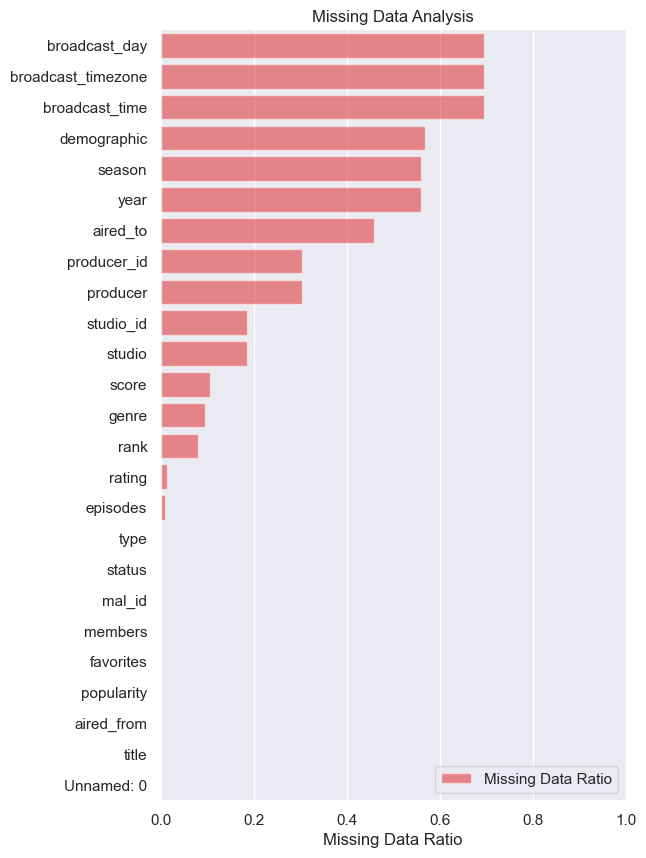

In [6]:
missing_ratios = anime_df.apply(lambda x: 1 - (x.count() / x.size))
missing_ratios = missing_ratios.sort_values(ascending=False)

plt.figure(figsize=(6, 10))
sns.set_theme()

sns.set_color_codes("pastel")
sns.barplot(x=missing_ratios, y=missing_ratios.index,
            label="Missing Data Ratio", color="red", alpha=0.5)

plt.legend(ncol=1, loc="lower right", frameon=True)
plt.xlim(0, 1)
plt.xlabel("Missing Data Ratio")
plt.ylabel("")
plt.title("Missing Data Analysis")
sns.despine(left=True, bottom=True)
plt.show()

Thanks to this graph, we were able to observe that numerous columns exhibit a significant number of missing values.

## Column Analysis

____________________
**mal_id**

Unique identifier for the anime on MyAnimeList.

In [7]:
anime_df['mal_id'].sample(5)

3810     8889
4635    30559
254     39783
1464     5028
2065    12725
Name: mal_id, dtype: int64

In [8]:
unique_counts = anime_df['mal_id'].nunique()
print(f"Number of unique VINs: {unique_counts}")

Number of unique VINs: 5504


It can be observed that the number of unique values in mal_id is equal to the dataset's total count, which suggests that there are no duplicate values.

____________________
**title**

In [9]:
anime_df['title'].sample(5)

1806                                           Kemonozume
3493                                 Hoshi Neko Fullhouse
2472    Detective Conan Movie 03: The Last Wizard of t...
3674                                 Kimagure Orange☆Road
1383                                             Hakuouki
Name: title, dtype: object

In [10]:
anime_df['title'].nunique()

5504

It can be seen that there are no duplicate anime titles.

____________________
**genre**


In [11]:
anime_df['genre'].unique()

array(['Adventure', 'Action', 'Drama', 'Sports', 'Comedy', 'Romance',
       'Slice of Life', 'Girls Love', 'Mystery', nan, 'Boys Love',
       'Fantasy', 'Suspense', 'Horror', 'Sci-Fi', 'Award Winning',
       'Supernatural', 'Gourmet', 'Avant Garde', 'Ecchi', 'Erotica',
       'Hentai'], dtype=object)

We can observe that there are several categories of genres, including Adventure, Action, Drama, Sports, Comedy, Slice of Life, Romance, and more. It indicates that anime titles in the dataset belong to various genre categories. Some entries might also have missing values (represented as nan).

In [12]:
anime_df['genre'].isnull().sum()

520

To handle the 520 null values in the `genre` column, it's proposed to utilize the information from the `demographic` column to assign appropriate values, ensuring that no data is lost.

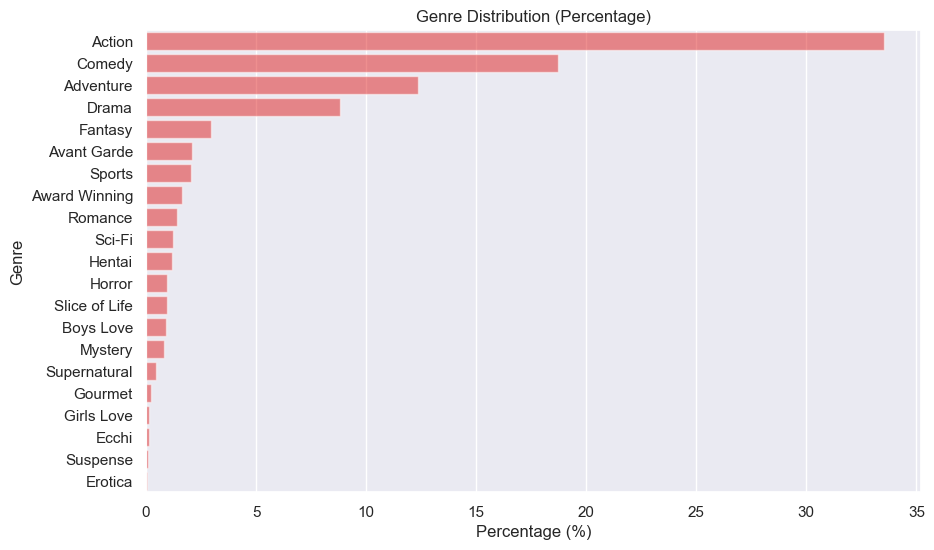

In [13]:
seating_percentage = anime_df['genre'].value_counts() / anime_df.shape[0] * 100
sns.set_theme()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=seating_percentage.values, y=seating_percentage.index, orient='h', color='red', alpha=0.5)
plt.xlabel('Percentage (%)')
plt.ylabel('Genre')
plt.title('Genre Distribution (Percentage)')
plt.show()

We can observe that "Action" is the most common genre, representing 34% of the dataset. It is followed by "Comedy" at 17%, and "Adventure" takes the third place with 12%. On the other hand, some genres like "Erotica" have very low representation, around 0%. 

____________________
**episodes**


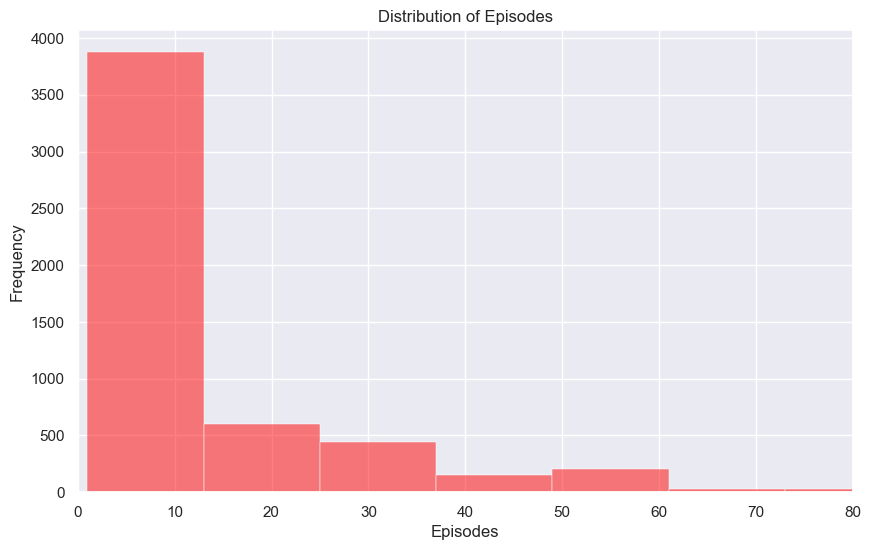

In [14]:
plt.figure(figsize=(10, 6))
sns.set_theme()
sns.histplot(data=anime_df, x='episodes', bins=30, color="red", alpha=0.5, binwidth=12)
plt.xlabel('Episodes')
plt.ylabel('Frequency')
plt.title('Distribution of Episodes')
plt.xlim(0, 80)
plt.show()

In [15]:
anime_df['episodes'].isnull().sum()

51

Given the minimal number of missing values (51), these can be addressed by either imputing the missing values with the column's average or opting for their removal based.

____________________
**broadcast_day / broadcast_time / broadcast_timezone**

In [16]:
anime_df[['broadcast_day','broadcast_time','broadcast_timezone']].sample(5)

,broadcast_day,broadcast_time,broadcast_timezone
4499,NaN,NaN,NaN
4375,NaN,NaN,NaN
2316,NaN,NaN,NaN
5022,NaN,NaN,NaN
2108,NaN,NaN,NaN


In [17]:
null_percentage = (anime_df['broadcast_day'].isnull().sum() / len(anime_df)) * 100
print(f"The percentage of null values in the 'broadcast_day' column is: {null_percentage:.2f}%")

The percentage of null values in the 'broadcast_day' column is: 69.53%


In [18]:
null_percentage = (anime_df['broadcast_time'].isnull().sum() / len(anime_df)) * 100
print(f"The percentage of null values in the 'broadcast_time' column is: {null_percentage:.2f}%")

The percentage of null values in the 'broadcast_time' column is: 69.53%


In [19]:
null_percentage = (anime_df['broadcast_timezone'].isnull().sum() / len(anime_df)) * 100
print(f"The percentage of null values in the 'broadcast_timezone' column is: {null_percentage:.2f}%")

The percentage of null values in the 'broadcast_timezone' column is: 69.53%


Among the columns `broadcast_day`, `broadcast_time`, and `broadcast_timezone`, `broadcast_time` and `broadcast_timezone` will be removed due to the complexity of calculating these values without additional information, along with their high rate of missing values at 68.86%. Instead, the information from `broadcast_day` can potentially be replaced using the `aired_from` column since it's common for release days to align with broadcasting days.

____________________
**season / year**

In [20]:
anime_df[['season','year','aired_from']].sample(5)

,season,year,aired_from
4939,NaN,NaN,1968-01-01T00:00:00+00:00
429,NaN,NaN,2020-12-25T00:00:00+00:00
5115,fall,1963.0,1963-11-07T00:00:00+00:00
3896,summer,1985.0,1985-07-15T00:00:00+00:00
4558,fall,1977.0,1977-10-05T00:00:00+00:00



In this case, missing values in the `year` and `season` columns will be filled using the `aired_from` column. This approach allows us to extract the year from the date and determine the season based on the date as well.

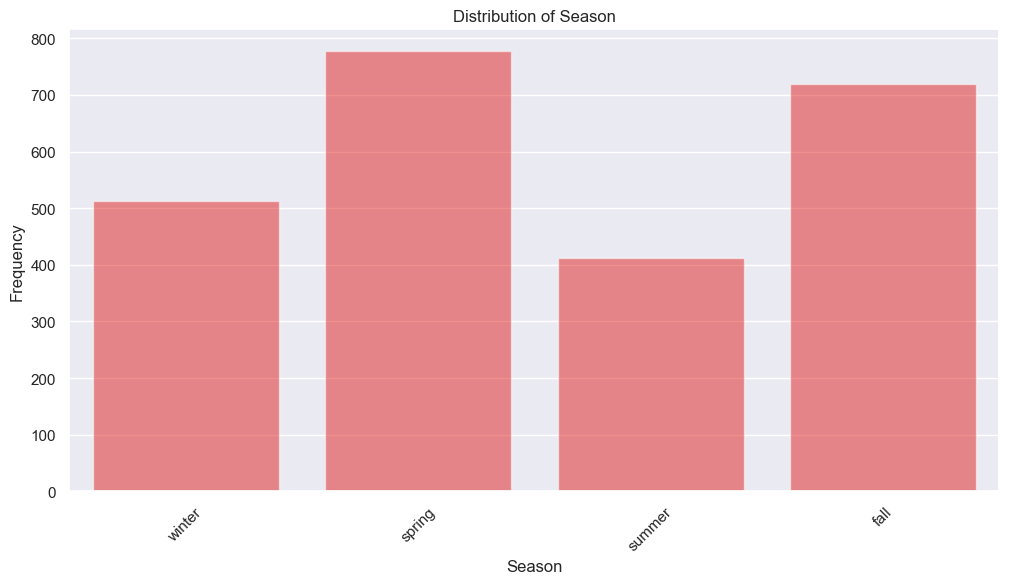

In [21]:
sns.set_theme()
plt.figure(figsize=(12, 6))
sns.countplot(data=anime_df, x='season', color="red", alpha=0.5)
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title('Distribution of Season')
plt.xticks(rotation=45)
plt.show()

It reveals that the spring season has the highest number of anime releases, closely followed by the fall season. In contrast, the winter season has considerably fewer premieres, and the summer season has the fewest. 

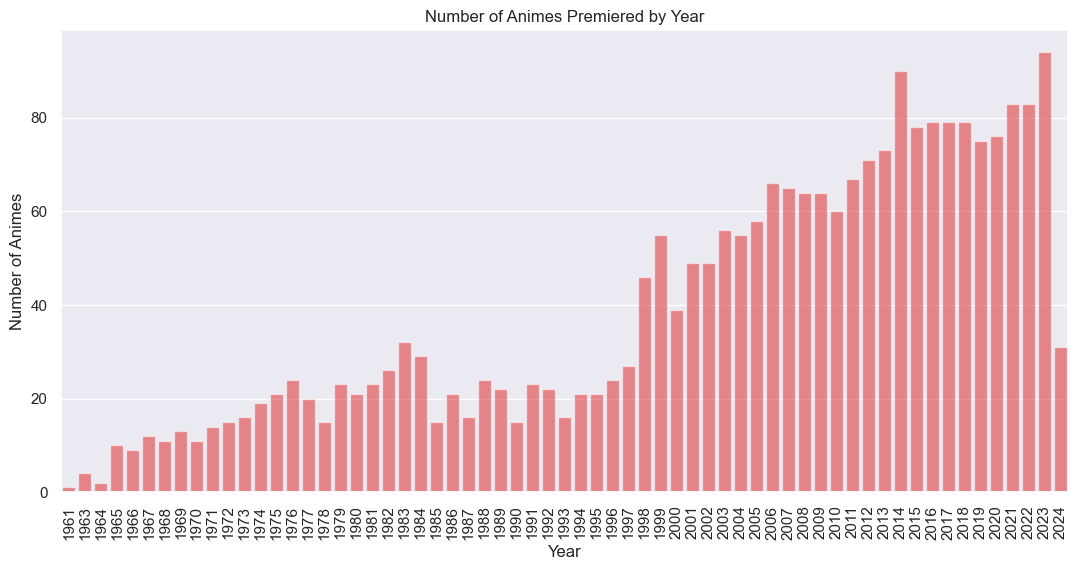

In [22]:
year_data = anime_df['year'].dropna().astype(int)
year_counts = year_data.value_counts().sort_index()
plt.figure(figsize=(13, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, color="red", alpha=0.5,)
plt.title('Number of Animes Premiered by Year')
plt.xlabel('Year')
plt.ylabel('Number of Animes')
plt.xticks(rotation=90)
plt.show()

We can observe that we have anime records ranging from 1961 to 2024. It's interesting to note that we are currently in the year 2023. Additionally, there is a noticeable trend of an increasing number of anime releases per year. To maintain data accuracy and relevance, records with the year 2024 will be removed, as they represent anime scheduled for future release.

____________________
**producer / producer_id**

In [23]:
anime_df[['producer','producer_id']].sample(5)

,producer,producer_id
910,Sotsu,64.0
5182,NaN,NaN
3214,Kadokawa Shoten,113.0
4973,NaN,NaN
578,AT-X,238.0


In [24]:
null_percentage = (anime_df['producer'].isnull().sum() / len(anime_df)) * 100
print(f"The percentage of null values in the 'producer' column is: {null_percentage:.2f}%")

The percentage of null values in the 'producer' column is: 30.36%


In [25]:
null_percentage = (anime_df['producer_id'].isnull().sum() / len(anime_df)) * 100
print(f"The percentage of null values in the 'producer_id' column is: {null_percentage:.2f}%")

The percentage of null values in the 'producer_id' column is: 30.36%


In this case, two options were considered: either removing rows where the `producer` column is null or using an identifier to indicate that the producer is unknown. 

____________________
**studio / studio_id**

In [26]:
anime_df[['studio','studio_id']].sample(5)

,studio,studio_id
2799,Pierrot,1.0
2841,Chaos Project,462.0
3423,Madhouse,11.0
1026,Pierrot,1.0
4910,NaN,NaN


In [27]:
null_percentage = (anime_df['studio'].isnull().sum() / len(anime_df)) * 100
print(f"The percentage of null values in the 'studio' column is: {null_percentage:.2f}%")

The percentage of null values in the 'studio' column is: 18.51%


In [28]:
null_percentage = (anime_df['studio_id'].isnull().sum() / len(anime_df)) * 100
print(f"The percentage of null values in the 'studio_id' column is: {null_percentage:.2f}%")

The percentage of null values in the 'studio_id' column is: 18.51%


In the case of the `studio` column, similar treatment options could be considered as with the `producer` and  `producer_id` columns.

____________________
**aired_to**

In [29]:
anime_df['aired_to'].sample(3)

30                            NaN
5494                          NaN
4320    1981-01-31T00:00:00+00:00
Name: aired_to, dtype: object

In [30]:
null_percentage = (anime_df['aired_to'].isnull().sum() / len(anime_df)) * 100
print(f"The percentage of null values in the 'aired_to' column is: {null_percentage:.2f}%")

The percentage of null values in the 'aired_to' column is: 45.95%


In this case, the `aired_to` column will be removed, as it is challenging to calculate when an anime concluded.

____________________
**demographic**

In [31]:
null_percentage = (anime_df['demographic'].isnull().sum() / len(anime_df)) * 100
print(f"The percentage of null values in the 'demographic' column is: {null_percentage:.2f}%")         

The percentage of null values in the 'demographic' column is: 56.90%


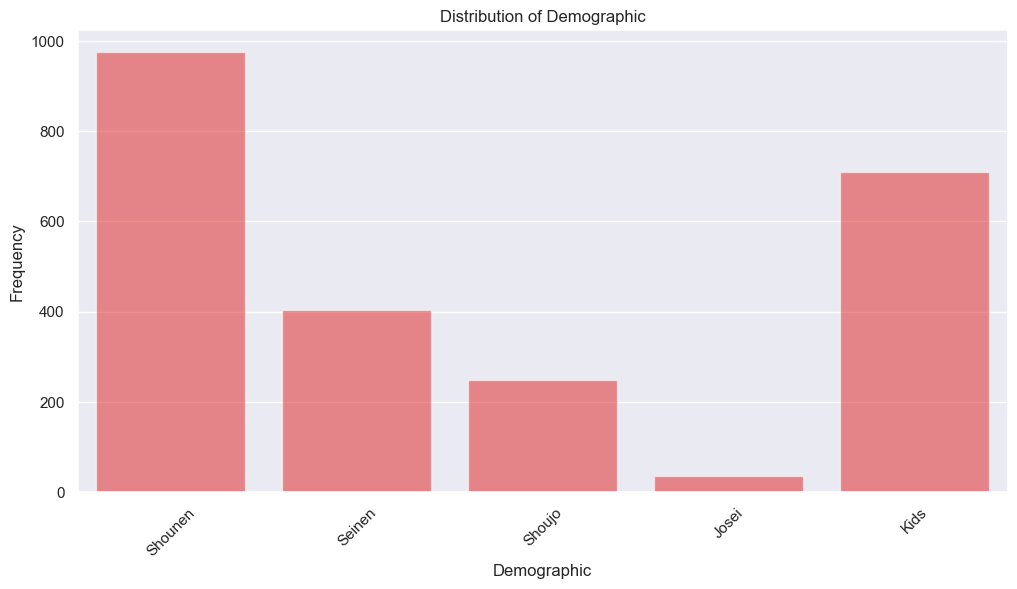

In [32]:
sns.set_theme()
plt.figure(figsize=(12, 6))
sns.countplot(data=anime_df, x='demographic', color="red", alpha=0.5)
plt.xlabel('Demographic')
plt.ylabel('Frequency')
plt.title('Distribution of Demographic')
plt.xticks(rotation=45)
plt.show()

It's evident that the ``demographic`` category 'Shounen' has the highest frequency, followed by 'Kids' with around 600 occurrences, 'Seinen' with 400, 'Shoujo,' and 'Josei.' Due to the high number of null values and the lack of another column to impute values, it was decided to remove this column

____________________
**rank**

In [33]:
anime_df['rank'].sample(5)

5296    17743.0
5214    18977.0
5164        NaN
3470     9166.0
2267     3059.0
Name: rank, dtype: float64

In [34]:
anime_df['rank'].nunique()

4887

In [35]:
same_rank_animes = anime_df[anime_df.duplicated(subset=['rank'], keep=False)]
same_rank_animes['rank'].value_counts()

rank
4443.0     3
6148.0     3
2477.0     2
10882.0    2
5480.0     2
          ..
8314.0     2
6271.0     2
2523.0     2
2464.0     2
12623.0    2
Name: count, Length: 176, dtype: int64

It can be observed that the number of unique values is lower than that of the DataFrame, indicating that there are animes with the same rank, which doesn't make much sense. This could happen because the rank changes every time new anime is released. Therefore, the decision was made to remove this column.

## Columns to Drop

- `demographic`
- `aired_yo`
- `broadcast_time`
- `broadcast_timezone`
- `rank`
- `studio_id`
- `producer_id`

In [36]:
columns_to_drop = ['demographic', 'aired_to', 'broadcast_time', 'broadcast_timezone', 'rank', 'studio_id', 'producer_id', 'Unnamed: 0']
anime_df.drop(columns=columns_to_drop, inplace=True)

In [37]:
anime_df.drop_duplicates(inplace=True)

In [38]:
anime_df.shape

(5504, 17)

A total of 5 columns have been successfully removed from the dataset, resulting in a reduced dataset containing 19 columns.

## Data Transformation

In [39]:
anime_df_copy = anime_df.copy()

**Missing Values: Removing Nulls**

____________________
**score**


In [40]:
anime_df_copy['score'].isnull().sum()

581

In [41]:
anime_df_copy = anime_df_copy[pd.notna(anime_df_copy['score'])]
anime_df_copy['score'].isnull().sum()

0

Given the substantial number of missing values (581) in the `score` column, it has been decided to simply remove them. Attempting to fill these missing values would be challenging and might compromise the accuracy of the data.

____________________
**rating**

In [42]:
anime_df_copy['rating'].value_counts(dropna=False)

rating
PG-13 - Teens 13 or older         2319
G - All Ages                       961
R - 17+ (violence & profanity)     662
R+ - Mild Nudity                   563
PG - Children                      264
Rx - Hentai                        131
NaN                                 23
Name: count, dtype: int64

In [43]:
anime_df_copy = anime_df_copy[pd.notna(anime_df_copy['rating'])]
anime_df_copy['rating'].replace({
    'PG-13 - Teens 13 or older': 'Teens',
    'G - All Ages': 'All Ages',
    'R - 17+ (violence & profanity)': 'Mature',
    'R+ - Mild Nudity': 'Mature',
    'PG - Children': 'All Ages',
    'Rx - Hentai': 'Mature'
}, inplace=True)
anime_df_copy['rating'].value_counts(dropna=False)

rating
Teens       2319
Mature      1356
All Ages    1225
Name: count, dtype: int64

NAN values were removed due to their limited quantity, and an alternative classification system was adopted for the `rating` column. The new classification is as follows:

- Teens for 'PG-13 - Teens 13 or older'
- All Ages for 'G - All Ages', 'PG - Children'
- Mature for 'R - 17+ (violence & profanity)', 'R+ - Mild Nudity', 'Rx - Hentai'

____________________
**genre**


In [44]:
anime_df_copy['genre'].value_counts(dropna=False)

genre
Action           1783
Comedy            961
Adventure         631
Drama             450
NaN               229
Fantasy           138
Sports             98
Avant Garde        91
Award Winning      88
Romance            73
Hentai             63
Sci-Fi             57
Horror             51
Boys Love          49
Slice of Life      44
Mystery            42
Supernatural       19
Gourmet            11
Girls Love          7
Ecchi               7
Suspense            5
Erotica             3
Name: count, dtype: int64

In [45]:
anime_df_copy = anime_df_copy[pd.notna(anime_df_copy['genre'])]
anime_df_copy['genre'].unique()

array(['Action', 'Comedy', 'Romance', 'Adventure', 'Fantasy', 'Mystery',
       'Drama', 'Suspense', 'Horror', 'Sci-Fi', 'Boys Love',
       'Slice of Life', 'Sports', 'Award Winning', 'Supernatural',
       'Gourmet', 'Girls Love', 'Avant Garde', 'Ecchi', 'Erotica',
       'Hentai'], dtype=object)

Given the removal of the `demographic` column, the initial approach of filling null values in the `body_type` column using information from that column is no longer feasible. As a result, it was decided to simply remove the number of missing values in the `body_type` column.

____________________
**type**

In [46]:
anime_df_copy['type'].value_counts(dropna=False)

type
TV         2302
Movie      1030
OVA         954
Special     301
ONA          58
Music        25
NaN           1
Name: count, dtype: int64

In [47]:
anime_df_copy['type'] = anime_df_copy['type'].replace('Music', np.nan)
anime_df_copy = anime_df_copy[pd.notna(anime_df_copy['type'])]

Due to the low number of NaN values in the `type` column, the decision was made to simply remove them. Additionally, rows labeled as 'Music' were also eliminated, as the analysis does not focus on anime songs.

**Transformations**

____________________
**episodes**

In [48]:
result = anime_df_copy.groupby('type')['episodes'].agg(lambda x: x.mode().iloc[0])
result

type
Movie       1.0
ONA        12.0
OVA         1.0
Special     1.0
TV         12.0
Name: episodes, dtype: float64

In [49]:
default_seating_values = {'Movie': 1.0, 'ONA': 12.0, 'OVA': 1.0, 'Special': 1.0, 'TV': 12.0}
anime_df_copy['episodes'] = anime_df_copy.apply(lambda row: default_seating_values.get(row['type'], row['episodes']) if pd.isna(row['episodes']) else row['episodes'], axis=1).astype(int)
anime_df_copy['episodes'].isnull().sum()

0

To handle missing values in the `episodes` column, the most common value (mode) for `type` was assigned within each type group. 

____________________
**year**

In [50]:
anime_df_copy['aired_from'] = pd.to_datetime(anime_df_copy['aired_from'], errors='coerce')
anime_df_copy['year'] = anime_df_copy['aired_from'].dt.year
anime_df_copy['year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980,
       1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969,
       1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958,
       1957, 1956, 1954, 1952, 1950, 1949, 1948, 1947, 1946, 1945, 1944,
       1943, 1942, 1941, 1940, 1939, 1937, 1936, 1935, 1934, 1933, 1932,
       1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1918, 1917])

To address missing values in the `year` column, the decision was made to utilize information from the `aired_from` column. The `aired_from` dates were converted, and the corresponding years were extracted and assigned to the `year` column. 

____________________
**season**

In [51]:
season_to_check = 'winter'
selected_season_rows = anime_df_copy[anime_df_copy['season'] == season_to_check]
selected_season_rows['aired_from'] = pd.to_datetime(selected_season_rows['aired_from'], errors='coerce')
unique_months = selected_season_rows['aired_from'].dt.month.unique()
unique_months

array([1, 3, 2])

In [52]:
season_to_check = 'spring'
selected_season_rows = anime_df_copy[anime_df_copy['season'] == season_to_check]
selected_season_rows['aired_from'] = pd.to_datetime(selected_season_rows['aired_from'], errors='coerce')
unique_months = selected_season_rows['aired_from'].dt.month.unique()
unique_months

array([4, 5, 3])

In [53]:
season_to_check = 'summer'
selected_season_rows = anime_df_copy[anime_df_copy['season'] == season_to_check]
selected_season_rows['aired_from'] = pd.to_datetime(selected_season_rows['aired_from'], errors='coerce')
unique_months = selected_season_rows['aired_from'].dt.month.unique()
unique_months

array([7, 8, 9])

In [54]:
season_to_check = 'fall'
selected_season_rows = anime_df_copy[anime_df_copy['season'] == season_to_check]
selected_season_rows['aired_from'] = pd.to_datetime(selected_season_rows['aired_from'], errors='coerce')
unique_months = selected_season_rows['aired_from'].dt.month.unique()
unique_months

array([10, 11, 12])

In [55]:
month_to_season = {
    1: 'winter', 2: 'winter', 3: 'winter',
    4: 'spring', 5: 'spring', 6: 'spring',
    7: 'summer', 8: 'summer', 9: 'summer',
    10: 'fall', 11: 'fall', 12: 'fall'
}
anime_df_copy['season'] = anime_df_copy['season'].fillna(anime_df_copy['aired_from'].dt.month.map(month_to_season))
anime_df_copy['season'].value_counts(dropna=False)

season
winter    1301
fall      1147
summer    1101
spring    1096
Name: count, dtype: int64

To fill the NaN values in the `season` column, the month from the `aired_from` column was used. To determine the months associated with each season, the unique months for each season were examined. It was observed that only spring and winter shared the same month, which was 3. Additionally, the month 6 did not appear in any of the seasons. Therefore, it was decided that month 3 would represent winter, and the unassigned month would represent spring.

____________________
**broadcast_day**

In [56]:
anime_df_copy['broadcast_day'].value_counts(dropna=False)

broadcast_day
NaN           2983
Sundays        315
Fridays        301
Saturdays      296
Thursdays      208
Tuesdays       194
Wednesdays     191
Mondays        157
Name: count, dtype: int64

In [57]:
anime_df_copy['broadcast_day'] = anime_df_copy['broadcast_day'].str.rstrip('s')
anime_df_copy['broadcast_day'].fillna(anime_df_copy['aired_from'].dt.day_name(), inplace=True)
anime_df_copy['broadcast_day'].value_counts(dropna=False)

broadcast_day
Saturday     1220
Friday        881
Sunday        601
Wednesday     573
Thursday      536
Tuesday       446
Monday        388
Name: count, dtype: int64

To fill in the missing values, it was decided to use the day from `aired_from` since it is common for the release day to be the airing day. Additionally, the 's' was removed to keep only the day.

____________________
**producer**

In [58]:
anime_df_copy['producer'].value_counts(dropna=False)

producer
NaN                                      1207
Aniplex                                   288
TV Tokyo                                  243
Bandai Visual                             206
Lantis                                     91
                                         ... 
Lawson Entertainment                        1
TMS-Kyokuchi                                1
Glovision                                   1
E&G Films                                   1
Tenkatsu Tennenshoku Katsudou Shashin       1
Name: count, Length: 335, dtype: int64

In [59]:
anime_df_copy['producer'].fillna('Unknown', inplace=True)

In order to address the numerous NaN values in the `producer` column without resorting to removal, a decision was made to fill these missing values with the placeholder 'Unknown'.

____________________
**studio**

In [60]:
anime_df_copy['studio'].value_counts(dropna=False)

studio
NaN                      442
Toei Animation           374
Madhouse                 215
J.C.Staff                212
Sunrise                  209
                        ... 
Rikuentai                  1
Tamura Shigeru Studio      1
Studio Flad                1
Studio Bogey               1
Image Kei                  1
Name: count, Length: 309, dtype: int64

In [61]:
anime_df_copy['studio'].fillna('Unknown', inplace=True)

To handle the NaN values in the `studio` column, a similar strategy to the `producer` column was employed. 

**Data Transformation Summary**

In [62]:
anime_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4645 entries, 47 to 5500
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   mal_id         4645 non-null   int64              
 1   title          4645 non-null   object             
 2   score          4645 non-null   float64            
 3   season         4645 non-null   object             
 4   year           4645 non-null   int32              
 5   aired_from     4645 non-null   datetime64[ns, UTC]
 6   popularity     4645 non-null   int64              
 7   favorites      4645 non-null   int64              
 8   members        4645 non-null   int64              
 9   episodes       4645 non-null   int32              
 10  genre          4645 non-null   object             
 11  rating         4645 non-null   object             
 12  status         4645 non-null   object             
 13  broadcast_day  4645 non-null   object             
 

After completing all the necessary transformations, the dataset no longer contains any missing or null values. The dataset is now clean and ready for further analysis and is prepared for storage.

In [69]:
anime_df_copy = anime_df_copy.rename(columns={
    'genre': 'genres',
    'rating': 'classification',
    'broadcast_day': 'airing_day',
    'producer': 'production',
    'studio': 'animation_studio',
    'type': 'content_type'
})
anime_df_copy.head()

,mal_id,title,score,season,year,aired_from,popularity,favorites,members,episodes,genres,classification,status,airing_day,production,animation_studio,content_type
47,51535,Shingeki no Kyojin: The Final Season - Kankets...,8.99,winter,2023,2023-03-04 00:00:00+00:00,396,13089,533775,2,Action,Mature,Finished Airing,Saturday,Production I.G,MAPPA,Special
48,49387,Vinland Saga Season 2,8.81,winter,2023,2023-01-10 00:00:00+00:00,408,11337,523657,24,Action,Mature,Finished Airing,Tuesday,Dentsu,MAPPA,TV
49,52305,Tomo-chan wa Onnanoko!,7.82,winter,2023,2023-01-05 00:00:00+00:00,651,2645,349022,13,Comedy,Teens,Finished Airing,Thursday,Aniplex,Lay-duce,TV
50,50608,Tokyo Revengers: Seiya Kessen-hen,7.69,winter,2023,2023-01-08 00:00:00+00:00,722,2409,319812,13,Action,Mature,Finished Airing,Sunday,Mainichi Broadcasting System,LIDENFILMS,TV
51,48417,Maou Gakuin no Futekigousha: Shijou Saikyou no...,6.91,winter,2023,2023-01-08 00:00:00+00:00,750,4027,307204,12,Action,Mature,Finished Airing,Sunday,Aniplex,SILVER LINK.,TV
